# Практическое занятие 4

# Основы ООП

В программировании есть несколько парадигм, т. е.набор правил и критериев, которые соблюдают разработчики при написании кода.

Одна из наиболее распространённых это парадигма объектно-ориентированного программирования.

**Объектно-ориентированное программирование** (ООП) — это одна из парадигм разработки, суть которой заключается в том, что все программы, написанные с применением этой парадигмы, состоят из **объектов**. Каждый **объект** — это определённая сущность со своими данными и набором доступных действий. 

Например, нужно написать для интернет-магазина каталог товаров. Руководствуясь принципами ООП, в первую очередь нужно создать объекты: карточки товаров. Потом заполнить эти карточки данными: названием товара, свойствами, ценой. И потом прописать доступные действия для объектов: обновление, изменение, взаимодействие.

Кроме ООП, существуют и другие парадигмы. Из них наиболее распространена **функциональная**, в которой работают не с объектами, а с функциями. Если использовать функциональную парадигму, чтобы сделать каталог товаров, то начинать нужно не с карточек, а с функций, заполняющих эти карточки. То есть объект будет не отправной точкой, а результатом работы функции. 

Обычно написать функцию быстрее, чем создавать объекты и прописывать взаимодействие между ними. Но если объём кода большой, работать с разрозненными функциями сложно.

Таким образом, центральные понятием в ООП являются объекты.
Объекты, в свою очередь, являются экземплярами классов – с этой точки зрения классы можно назвать шаблонами для создания объектов определенного типа. 

Классы определяют:

* структуру данных, которые характеризуют объект;
* свойства (атрибуты) и статус (состояние) объекта;
* операции, которые можно совершать с данными объекта (методы).

Рассмотрим пример класса:

In [1]:
class Car:
    def __init__(self, make, model, year):
        self.make = make
        self.model = model
        self.year = year

**Атрибуты** – это свойства, характеристики объекта. 

Атрибуты объекта перечисляют внутри __init__ метода класса – он вызывается каждый раз при создании экземпляра класса. Параметр self создает ссылку на экземпляр класса и позволяет получить доступ к атрибутам и методам объекта. Для создания экземпляра Car достаточно вызвать класс, передавая в скобках значения, соответствующие его атрибутам:

In [7]:
my_car = Car("Toyota", "Corolla", 2023)

После присвоения атрибутам значений к ним мы можем обращаться через выражение название_объекта.атрибут:

In [8]:
print(f'Марка машины {my_car.make},'
      f'\nмодель {my_car.model},'
      f'\nгод выпуска - {my_car.year}'
      )

Марка машины Toyota,
модель Corolla,
год выпуска - 2023


Мы рассмотрели пример простейшего класса: у него нет ни подклассов, ни методов, кроме обязательного __init__. 

Метод – это функция, которая определяет поведение объекта. 

Проиллюстрируем создание метода на примере класса WashingMachine – здесь методremaining_warranty_time() определяет срок истечения гарантии на стиральную машину:

In [12]:
import datetime

class WashingMachine:
    def __init__(self, brand, model, purchase_date, warranty_length):
        self.brand = brand
        self.model = model
        self.purchase_date = purchase_date
        self.warranty_length = warranty_length

    def remaining_warranty_time(self):
        today = datetime.date.today()
        warranty_end_date = self.purchase_date + datetime.timedelta(days=self.warranty_length)
        remaining_time = warranty_end_date - today
        if remaining_time.days < 0:
            return "Срок действия гарантии истек."
        else:
            return "Срок действия гарантии истекает через {} дней.".format(remaining_time.days)

# создаем объект стиральной машины
my_washing_machine = WashingMachine("LG", "FH4U2VCN2", datetime.date(2020, 5, 7), 1550)

# вызываем метод для проверки срока истечения гарантии
print(my_washing_machine.remaining_warranty_time())

Срок действия гарантии истек.


## Основные принципы объектно-ориентированного программирования:

**Инкапсуляция** - механизм сокрытия деталей реализации класса от других объектов. Достигается путем использования модификаторов доступа public, private и protected, которые соответствуют публичным, приватным и защищенным атрибутам.

Например, метод для внесения данных в карточку товара должен обязательно быть прописан в классе «Карточка товара». А не в классе «Корзина» или «Каталог товаров». 

Такой принцип обеспечивает безопасность и не даёт повредить данные внутри какого-то класса со стороны. Ещё он помогает избежать случайных зависимостей, когда из-за изменения одного объекта что-то ломается в другом.

**_attribute (с одним подчеркиванием)** – режим доступа protected (служит для обращения внутри класса и во всех его дочерних классах)

**__attribute (с двумя подчеркиваниями)** – режим доступа private (служит для обращения только внутри класса).

Сделаем атрибуты title, author и isbn класса Book приватными – теперь доступ к ним возможен только внутри класса:

In [14]:
class Book:
    def __init__(self, title, author, isbn):
        self.__title = title  # приватный
        self.__author = author  # приватный
        self.__isbn = isbn  # приватный

In [15]:
book1 = Book('1', 'Tolkien', 178173)
print(book1.title)

AttributeError: 'Book' object has no attribute 'title'

Чтобы получить доступ к этим атрибутам извне класса, мы определяем методы getter и setter, которые обеспечивают контролируемый доступ к атрибутам:

In [21]:
class Book:
    def __init__(self, title, author, isbn):
        self.genre = 'Fantasy'
        self.__title = title  # приватный
        self.__author = author  # приватный
        self.__isbn = isbn  # приватный
        
    def get_title(self):
        return self.__title

    def set_title(self, title):
        self.__title = title

    def get_author(self):
        return self.__author

    def set_author(self, author):
        self.__author = author

    def get_isbn(self):
        return self.__isbn

    def set_isbn(self, isbn):
        self.__isbn = isbn

In [17]:
book0 = Book("Властелин колец", "Дж. Р. Р. Толкина", "558-0743553565")
book0.author

AttributeError: 'Book' object has no attribute 'author'

В этом примере методы get_title(), get_author() и get_isbn() являются получающими методами (геттерами), которые позволяют нам получать значения приватных атрибутов извне класса. Методы set_title(), set_author() и set_isbn() – устанавливающие методы (сеттеры), которые позволяют нам устанавливать значения частных атрибутов извне класса.

Создадим экземпляр объекта и попытаемся получить доступ к его названию с помощью обычного метода:

In [22]:
book1 = Book("Властелин колец", "Дж. Р. Р. Толкина", "558-0743553565")

# пытаемся получить доступ к приватному атрибуту
print(book1.__title)

AttributeError: 'Book' object has no attribute '__title'

Воспользуемся геттерами:

In [23]:
print(book1.get_title())
print(book1.get_author())
print(book1.get_isbn())

Властелин колец
Дж. Р. Р. Толкина
558-0743553565


Изменим название с помощью сеттера и выведем результат:

In [25]:
book1.set_title("Гарри Поттер")
print(book1.get_title())

Гарри Поттер


In [26]:
print(book1.get_title())

Гарри Поттер


## Наследование

**Наследование** - процесс создания нового класса на основе существующего класса. Новый класс, называемый подклассом или производным классом, наследует свойства и методы существующего класса, называемого суперклассом или базовым классом.

Написание кода с использованием ООП выглядит следующим образом: 

● Класс с определёнными свойствами;

● Подкласс на его основе, который берёт свойства класса и добавляет свои;

● Объект подкласса, который также копирует его свойства и добавляет свои. 

Каждый дочерний элемент наследует методы и атрибуты, прописанные в родительском. Он может использовать их все, отбросить часть или добавить новые. При этом заново прописывать эти атрибуты и методы не нужно. 

Для иллюстрации концепции наследования мы определим класс Publication, который имеет свойства, общие для всех публикаций – title, author и year, а также общий метод display():

In [31]:
class Publication:
    def __init__(self, title, author, year):
        self.title = title
        self.author = author
        self.year = year

    def display(self):
        print("Название:", self.title)
        print("Автор:", self.author)
        print("Год выпуска:", self.year)

In [32]:
publication1 = Publication("Властелин колец", "Дж. Р. Р. Толкина", 2019)
publication1.display()

Название: Властелин колец
Автор: Дж. Р. Р. Толкина
Год выпуска: 2019


Теперь создадим два подкласса Book и Magazine, которые наследуют все свойства и методы от класса Publication, и кроме того, имеют свои атрибуты. Подкласс Book добавляет свойство isbn и переопределяет метод display() для включения свойства isbn. Подкласс Magazine добавляет свойство issue_number (номер выпуска) и переопределяет метод display() для включения свойства issue_number:

In [28]:
class Book(Publication):
    def __init__(self, title, author, year, isbn):
        super().__init__(title, author, year)
        self.isbn = isbn

    def display(self):
        super().display()
        print("ISBN:", self.isbn)

class Magazine(Publication):
    def __init__(self, title, author, year, issue_number):
        super().__init__(title, author, year)
        self.issue_number = issue_number

    def display(self):
        super().display()
        print("Номер выпуска:", self.issue_number)

Теперь, если мы создадим экземпляр класса Book или класса Magazine, мы сможем вызвать метод display()для отображения свойств объекта. Сначала будет вызван метод display() подкласса (Book или Magazine), который в свою очередь вызовет метод display()суперкласса Publication с помощью функции super(). Это позволяет нам повторно использовать код суперкласса и избежать дублирования кода в подклассах:



In [30]:
# создаем объект книги
book1 = Book("Властелин колец", "Дж. Р. Р. Толкина", 2019, "112-3333273566")

# создаем объект выпуска журнала
magazine1 = Magazine("Вокруг света", "коллектив авторов", 2023, 3)

# выводим информацию о книге и номере журнала
book1.display()
magazine1.display()

Название: Властелин колец
Автор: Дж. Р. Р. Толкина
Год выпуска: 2019
ISBN: 112-3333273566
Название: Вокруг света
Автор: коллектив авторов
Год выпуска: 2023
Номер выпуска: 3


### Множественное наследование

Множественное наследование позволяет классу потомку иметь более одного родительского класса. 

При множественном наследовании класс потомок (дочерний) наследует все свойства родительских классов. Реализовать множественное наследование можн следующим образом:


In [1]:
class Base1:
    pass

class Base2:
    pass

# этот класс наследует сразу от двух родительских классов: Base1 и Base2
class BaseDerived(Base1, Base2):
    pass

### Многоуровневое наследование

Допускается наследование класса от класса потомка, т. е. многоуровневое наследование.
В многоуровневом наследовании свойства родительского класса и наследуемого от него класса передаются новому наследуемому классу.


In [2]:
class Base:
    pass

class Derived1(Base):
    pass

class Derived2(Derived1):
    pass

## Полиморфизм

Один и тот же метод может работать по-разному в зависимости от объекта, где он вызван, и данных, которые ему передали. Например, метод «Удалить» при вызове в корзине удалит товар только из корзины, а при вызове в карточке товара — удалит саму карточку из каталога. 

То же самое с объектами. Можно использовать их публичные методы и атрибуты в других функциях и быть уверенным, что всё сработает нормально. 

### Полиморфизм оператора сложения

In [33]:
num1 = 1
num2 = 2
print(num1 + num2)

3


In [34]:
str1 = "Python"
str2 = "Programming"
print(str1+" "+str2)

Python Programming


In [35]:
lst1 = [1, 2, 3, 4]
lst2 = [5, 6, 7]
print(lst1+lst2)

[1, 2, 3, 4, 5, 6, 7]


In [36]:
'1223' + 12

TypeError: can only concatenate str (not "int") to str

In [37]:
10*5

50

In [38]:
'10'*5

'1010101010'

In [39]:
[1, 2]*5

[1, 2, 1, 2, 1, 2, 1, 2, 1, 2]

### Полиморфизм функций

In [41]:
print(len("Python"))
print(len(["Python", "Java", "C"]))
print(len({"1": "a", "2": "b", "3": "c", "4": "d"}))

6
3
4


### Полиморфизм в методах класса

In [42]:
class Cat:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def info(self):
        print(f"I am a cat. My name is {self.name}. I am {self.age} years old.")

    def make_sound(self):
        print("Meow")


class Dog:
    def __init__(self, name, age):
        self.name = name
        self.age = age

    def info(self):
        print(f"I am a dog. My name is {self.name}. I am {self.age} years old.")

    def make_sound(self):
        print("Bark")


cat1 = Cat("Kitty", 2.5)
dog1 = Dog("Fluffy", 4)

for animal in (cat1, dog1):
    animal.make_sound()
    animal.info()
    animal.make_sound()

Meow
I am a cat. My name is Kitty. I am 2.5 years old.
Meow
Bark
I am a dog. My name is Fluffy. I am 4 years old.
Bark


## Абстракция

Ещё одним принципом ООП является абстракция.

**Абстракция** – процесс определения существенных характеристик объекта и игнорирования несущественных характеристик. Это позволяет создавать абстрактные классы, которые определяют общие свойства и поведение группы объектов, не уточняя детали каждого объекта.

## Правила оформления кода (PEP8)

Единообразие, наглядность и информативность — это основа PEP8.

Основные правила:

* В Python внутренние блоки кода выделяются отступами, а не специальными разделителями. Размер отступа — четыре пробела, табуляция не используется.

* Аргументы функций переносятся на следующую строку и выравниваются, если строка слишком длинная:
`def long_func (arg_one, arg_two,
                arg_three, arg_four)`
                
* Знаки операций ставятся после переноса строки:
`total_users = (currently_online
+ offline_but_active
+ offline_inactive
- duplicate_accounts
- banned)`

* Между функциями верхнего уровня и классами вставляются две пустые строки. Между определениями методов в классе — одна пустая строка. Разрешается добавлять пустые строки между логическими секциями.

* По правильно названной переменной или функции сразу понятно, зачем они нужны: в first_name лежит имя, а calculate_employee_salary() считает зарплату сотрудника.

In [21]:
# Правильно
 
first_name = 'Ivan'
last_name = 'Ivanov'
 
def plus_one (x):
    return x + 1
 
# Неправильно
 
fnm = 'Ivan'
lnm = 'Ivanov'
 
# Plus 1? Phase 1? Point 1?
def p1 (x):
    return x + 1

Рекомендации по оформлению кода


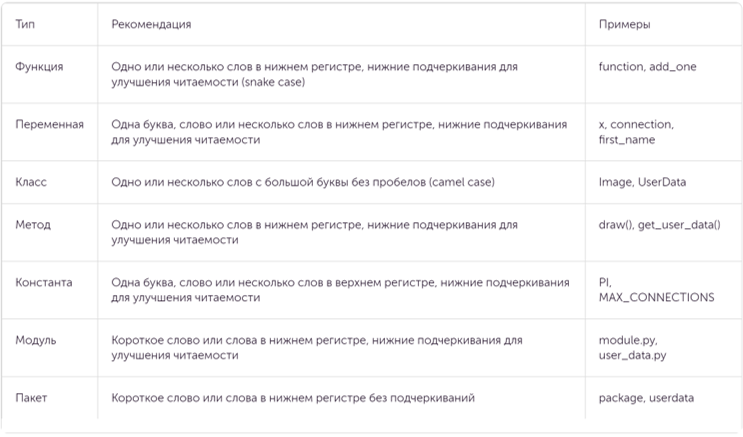

In [22]:
from IPython.display import Image
print('Рекомендации по оформлению кода')
Image("C:/Disc_D/MIPT/python_course/OOP.png") 

* Условия с булевыми значениями проверяются без оператора эквивалентности (==):

* Сравнение с None делается с помощью операторов is / is not:

if connection is None:
    print_error_message()
 
if user is not None:
    get_user_data()

* Хороший комментарий — полезный комментарий. Пользуйтесь простым и понятным языком и не забывайте обновлять их, если код меняется. Рекомендации PEP8:

1. Пишите полные предложения с заглавной буквы, если это не название.
2. Ставьте два пробела после точки в комментариях, кроме последнего предложения.
3. Пишите на английском, если читатели не знают ваш язык.

Блочные комментарии объясняют следующий за ними участок кода. Выравнивайте их на том же уровне и начинайте каждую строку с # и пробела. Параграфы в блочных комментариях разделяются строкой с одной #:

Не злоупотребляйте комментариями на той же строке (внутренними). Они не должны объяснять очевидных вещей и затруднять чтение кода. Отделяйте их от текста как минимум двумя пробелами и начинайте с # и пробела:



В многострочных комментариях ``` в конце переносится на новую строку:

В однострочных комментариях открывающие и закрывающие ``` — на той же строке:

* Импортируйте модули в начале файла, сразу после верхнеуровневых комментариев и строк документации. Группируйте их и разделяйте группы пустыми строками: сначала стандартная библиотека, потом — сторонние, в конце — локальные модули проекта. При импорте каждый модуль пишется с новой строки. Совмещайте несколько импортов из одного модуля:

In [23]:
import os
from math import pi, sin


* Для типов переменных вставляйте один пробел после двоеточия. Знак присваивания окружается пробелами с обеих сторон:

Подробнее с PEP8 можно ознакомится: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html

# Задания

1. Создайте класс BankAccount с приватным атрибутом balance. Реализуйте методы для депозита, снятия и проверки баланса. Используйте методы доступа для работы с приватным атрибутом. Это задание поможет вам понять, как использовать инкапсуляцию для защиты данных и как реализовать методы доступа для работы с приватными атрибутами.

In [ ]:
class BankAccount(object):
    def __init__(self, balance: float, interest_rate: float) -> None:
        self.__balance = balance
        self.__interest_rate = interest_rate
        self.__transactions = list()

    def deposit(self, amount: float) -> float:
        if amount <= 0:
            raise ValueError("transaction can't be zero or negative")
        self.__balance += amount
        self.__transactions.append(f"top up {amount}$")
        return self.__balance
    
    def withdraw(self, amount: float) -> float:
        if amount <= 0:
            raise ValueError("transaction can't be zero or negative")
        self.__balance -= amount
        self.__transactions.append(f"withdraw {amount}$")
        return self.__balance
    
    def add_interest(self) -> float:
        self.__transactions.append(f"add interest rate {self.__balance * self.__interest_rate / 100}$")
        self.__balance *= (1 + self.__interest_rate / 100)
        return self.__balance
    
    def history(self) -> None:
        print(*self.__transactions, sep='\n')
    


2. Создайте класс BankAccount, который имеет следующие свойства:

* balance – приватный атрибут для хранения текущего баланса счета;
* interest_rate –приватный атрибут для процентной ставки;
* transactions – приватный атрибут для списка всех операций, совершенных по счету.

Класс BankAccount должен иметь следующие методы:

* deposit(amount) – добавляет сумму к балансу и регистрирует транзакцию;
* withdraw(amount) – вычитает сумму из баланса и записывает транзакцию;
* add_interest()– добавляет проценты к счету на основе interest_rate и записывает транзакцию;
* history()– печатает список всех операций по счету.

2. Напишите класс MusicAlbum, у которого есть:

* Атрибуты title, artist, country, release_year, genre, tracklist (название, исполнитель, год выхода, жанр, список треков.
* Метод info() для вывода информации об альбоме.
* Метод play_track выводящий информацию о том какой сейчас трек исполняется.
* Метод play_random_track() для вывода случайного названия песни.

In [2]:
from random import randint


class MusicAlbum(object):
    def __init__(self, title: str, artist: str, country: str, release_year: int, genre: str, tracklist: list) -> None:
        self.title, self.artist, self.country, self.release_year, self.genre = title, artist, country, release_year, genre
        self.tracklist = tuple(tracklist)
        self._tracks_count = len(tracklist)
        self.current = 0
    
    def info(self) -> None:
        print(f"album \"{self.title}\" made by {self.artist} from {self.country} in {self.release_year}, in the {self.genre} genre")
    
    def play_track(self) -> None:
        print(self.tracklist[self.current])
    
    def play_random_track(self) -> None:
        self.current = randint(0, self._tracks_count - 1)
        self.play_track()


222
111
222
111
